<a href="https://colab.research.google.com/github/nichakornchaisuwan/multivariaet/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

Assumption: 

In [15]:
import pandas as pd

In [16]:
BFI_data = pd.read_csv('/content/bfi.csv') # อย่าลืม upload file ก่อนที่จะรันโค้ด
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


###Factor Analysis'
###Assumptions :
ในข้อมูล multivariata ที่มีตัวแปร observe variables จำนวน n ตัว 

มีตัวแปร Factor (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ 

โดย k<n

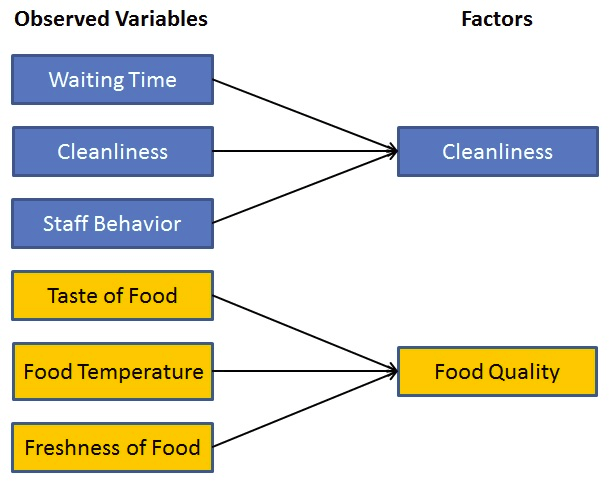

Assumption: ในการทำ Factor Analysis
* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be perfect multicollinearity.
* There should not be homoskedasticity between the variables.


### การทำ factor analysis มีประโยชน์หลัก 2 อัน คือ

* Confirmatory 
* Exploretory เพื่อจับกลุ่มตัวแปรว่า ใช้อธิบายอะไร


##การทำ Factor Analysis

In [17]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

แก้ error ModuleNotFoundError: No module named 'factor_analyzer'

โดย https://stackoverflow.com/questions/61830329/modulenotfounderror-no-module-named-factor-analyzer-python-notebook

วิธี install package อื่นๆ

In [18]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 2.7MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=26f336c6393d547ceee334b8a9ac654e4f96380f021862fe852699c855d6b489
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [19]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt  # = from matplotlib import pyplot as plt

### Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง .iloc[]

In [20]:
BFI_data_dropped = BFI_data.iloc[:,]

In [21]:
BFI_data_dropped = BFI_data.iloc[:,1:26]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


### เฉลย

In [22]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [26]:
BFI_data_dropped = BFI_data_dropped.dropna()


In [27]:
BFI_data_dropped.shape

(2436, 25)

### Bartlr

In [28]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity #import ตัวที่ต้องการใช้งาน
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped) # ถ้า p-value มีค่าเป็น 0 แสดงว่าไม่มี perfect.....
chi_square_value, p_value

(18170.966350869243, 0.0)

###Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO modal มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะทที่จะนำไปทำ Factor Analysis

In [29]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model # ถ้าคำนวนแล้วน้อยกว่า 6 วิธีนี้ไม่ควรที่จะทำ

0.8485397221949221

##Factor Analysis

###Import

In [30]:
from factor_analyzer import FactorAnalyzer

###Define

In [31]:
fa = FactorAnalyzer(n_factors=20)

###Fit_transform

In [32]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [33]:
data_fa.shape

(2436, 20)

###วิธีตัดสินว่าเราจะลดเหลือกี่ dimension (มี factors ทั้งหมดกี่ตัว)

In [34]:
ev,v = fa.get_eigenvalues()

### ใช้ eigen values

In [35]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

In [36]:
ev.shape

(25,)

###scree plot 

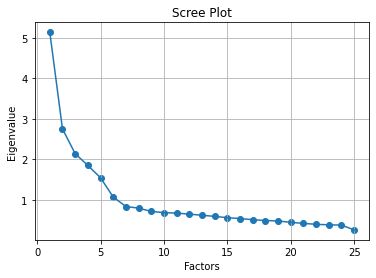

In [37]:
# Create scree plot using matplotlib
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

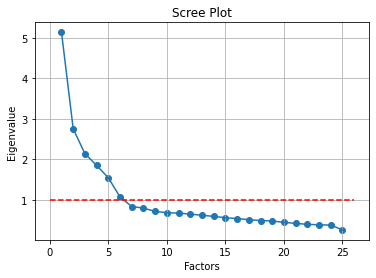

In [38]:
# Create scree plot using matplotlib
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [39]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

### Factor Analyzer



รัน factor analyzer อีกรอบ


In [40]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [41]:
fa2.loadings_.shape

(25, 6)

###plot factor loadings

In [42]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

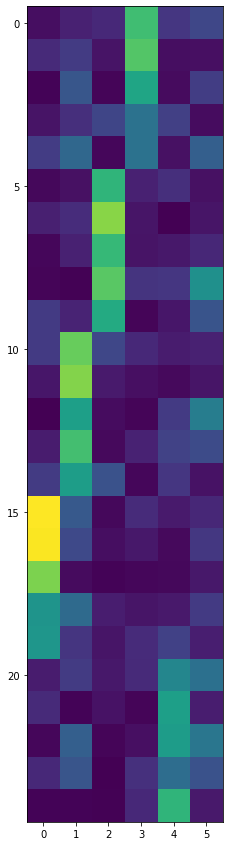

In [43]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_)) #แถบไหนสว่างหมายความว่า ค่าตรงนั้นมาก

### กราฟแท่ง

<BarContainer object of 25 artists>

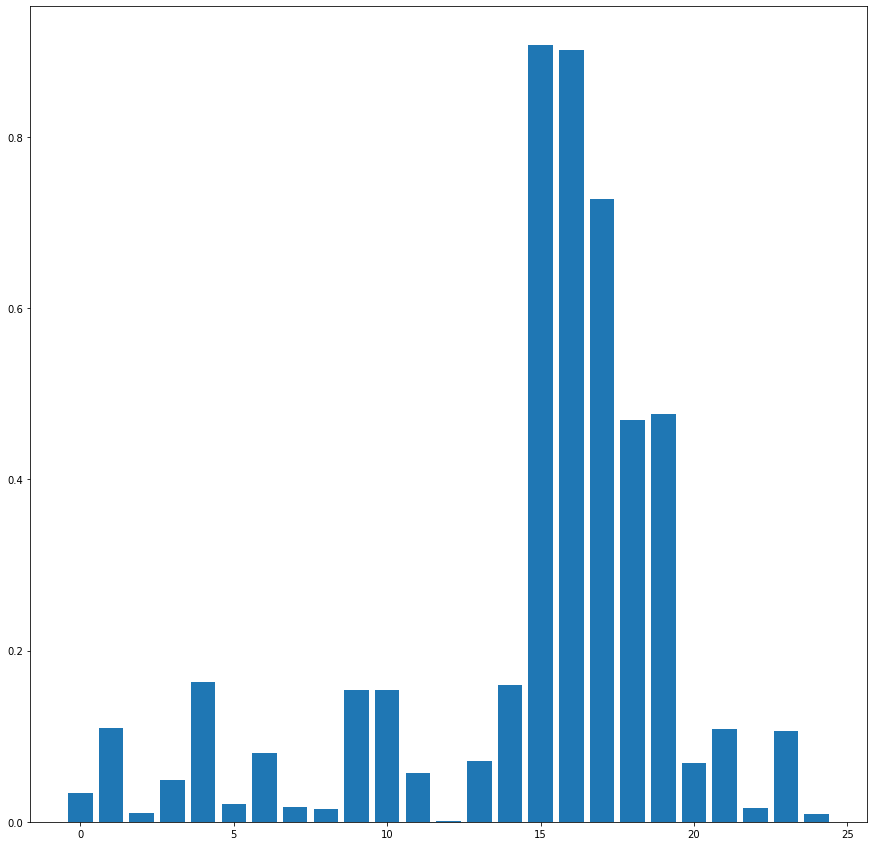

In [44]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]))

### Exam 03
ทำ factor analysis ข้อมูล fifa2018

#### นำข้อมูลเข้า

In [45]:
import pandas as pd

In [46]:
fifa=pd.read_csv('/content/FIFA 2018 Statistics.csv')
fifa.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [47]:
fifa.shape

(128, 27)

จากข้อมูลให้เลือกเฉพาะข้อมู,ที่เป็นตัวเลข เนื่อจากว่่าสามารถนำมาพลอตกราฟได้ ดังนั้นจึงเลือกข้อมูล Goal Scored ถึง Red

In [48]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [50]:
fifa_dropped=fifa.iloc[:,3:20] 
fifa_dropped

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [51]:
fifa_dropped=fifa_dropped.dropna()

In [52]:
fifa_dropped.shape

(128, 17)

#### Bartter's test

In [53]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(fifa_dropped)
chi_square_value,p_value

(1299.3697851171412, 2.713580160466225e-189)

ถ้าค่า p-value มีค่าเข้าใกล้ 0 ถือว่าดี จากผลลัพธ์ พบว่า ค่า p-value = 2.713 ซึ่งมีค่าเข้าใกล้ 0 สรุปได้ว่า ข้อมูลนั้นมีความเหมาะสมที่จะนำไปทำ Factor Analysis 

#### Kaiser Meyer Olkin (KMO) test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis (ยิ่งมีค่าสูงยิ่งดี)

In [54]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fifa_dropped)
kmo_model

0.5594556344508279

จากผลลัพธ์ พบว่ามีค่าเท่ากับ 0.559 ประมาณ 0.6 ดังนั้นข้อมูลจึงมีความเหมาะสมที่จะนำไปทำ Factor Analysis

#### Factor Analysis

##### Import

In [55]:
from factor_analyzer import FactorAnalyzer

##### Define

In [56]:
fa = FactorAnalyzer(n_factors=10)

##### Fit-tranform

In [57]:
data_fa=fa.fit_transform(fifa_dropped)

In [58]:
data_fa.shape

(128, 10)

จะลดเหลือกี่ Dimension ดูว่ามี Factors ทั้งหมดกี่ตัว

In [59]:
ev,v=fa.get_eigenvalues()

In [60]:
ev #ดูที่ค่า eigen values มากกว่า 1 

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

##### Scree plot เพื่อดูลักษณะของข้อมูล

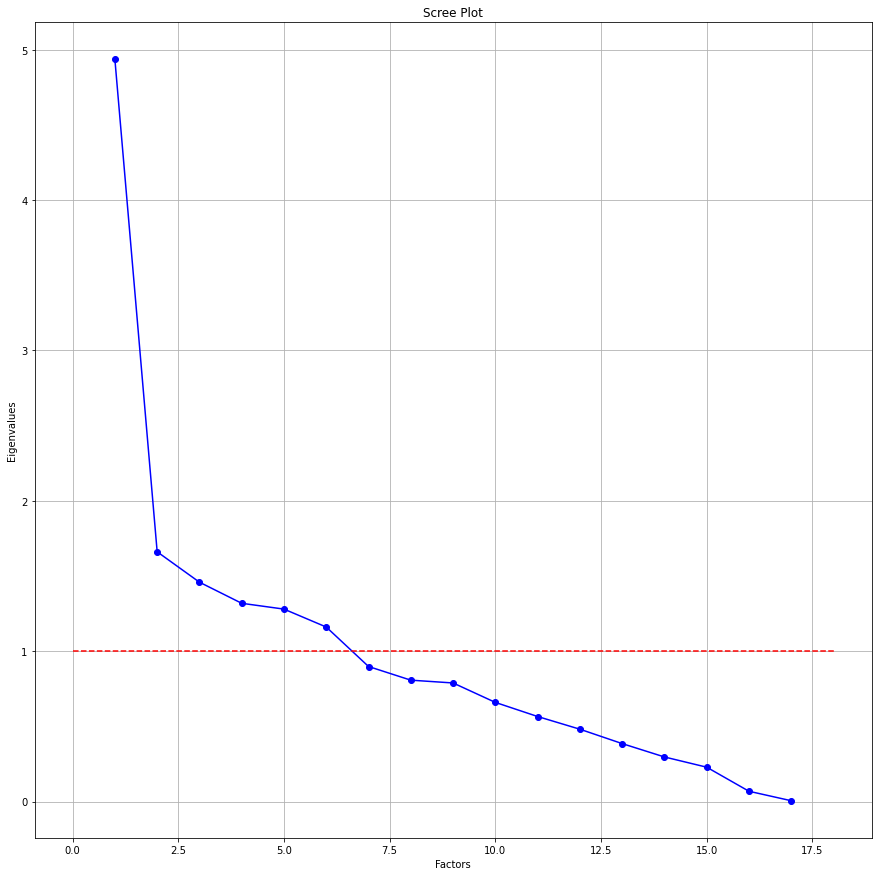

In [64]:
#Create scree plot using matholotlib
plt.plot(range(1,fifa_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,fifa_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

มี factor ที่มีค่ามากกว่า 1 อยู่ 6 ตัว

In [65]:
data_fa[:,:6]

array([[-1.14061137e+00,  1.05033795e+00,  2.79854567e+00,
         3.57574560e-01, -5.95152711e-02, -7.48334076e-02],
       [ 5.33831171e-01, -1.78150280e-01, -1.10088651e+00,
         1.81432000e-02, -8.36944321e-01, -7.31531607e-01],
       [-7.29379706e-01,  3.96402498e-01, -7.02153492e-01,
        -2.77221903e-01,  1.34345254e-01, -5.61356514e-01],
       [ 7.08580342e-01,  3.36178613e-01, -3.31529441e-01,
        -2.60518967e-01, -1.38667315e+00,  1.34916077e-01],
       [ 3.25530467e-01, -3.71841487e-01, -4.14431700e-01,
         3.27492853e-01,  2.50366459e-01,  2.57255932e-01],
       [-1.34130209e+00, -5.34562069e-01,  2.52429472e-01,
        -5.22235915e-01,  1.05852627e+00, -1.07428697e+00],
       [-5.46867894e-01, -4.92844282e-01,  9.46711298e-01,
        -3.59877314e-01, -1.85391071e-01, -3.25465436e-01],
       [ 1.67488741e+00, -4.32704892e-01,  7.61605381e-01,
        -3.70473849e-01, -8.35201718e-01, -5.88310671e-01],
       [ 2.62530209e-01, -3.24159295e-01,  6.589

รัน Factor Analyzer ด้วย Parameters จำนวน factors เท่ากับ 6

In [66]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(fifa_dropped)

In [67]:
fa2.loadings_.shape

(17, 6)

##### plot factor loadings

In [69]:
from matplotlib import  pyplot as plt
import numpy as np
import matplotlib

##### Matrix plot

โดยดูค่าจากสีของข้อมูล ถ้าสีสว่างมาก จะมีค่ามาก ถ้าสีเข้ม คือ มีค่าน้อย

##### Confirmatery

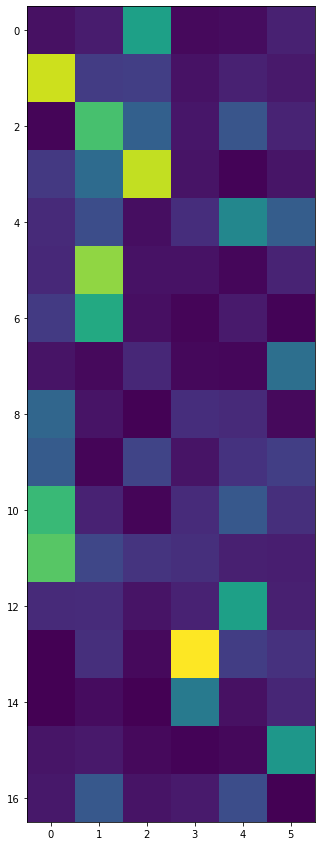

In [71]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_));

จากผลลัพธ์ พบว่า Factor Loadings ที่มีค่ามากคือ [0,1],[1,5],[2,3][3,13] ซึ่งสังเกตจากสีที่มีความสว่างมากกว่าสีอื่น ๆ

##### Exploratory กราฟแท่ง

In [72]:
fifa_dropped.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

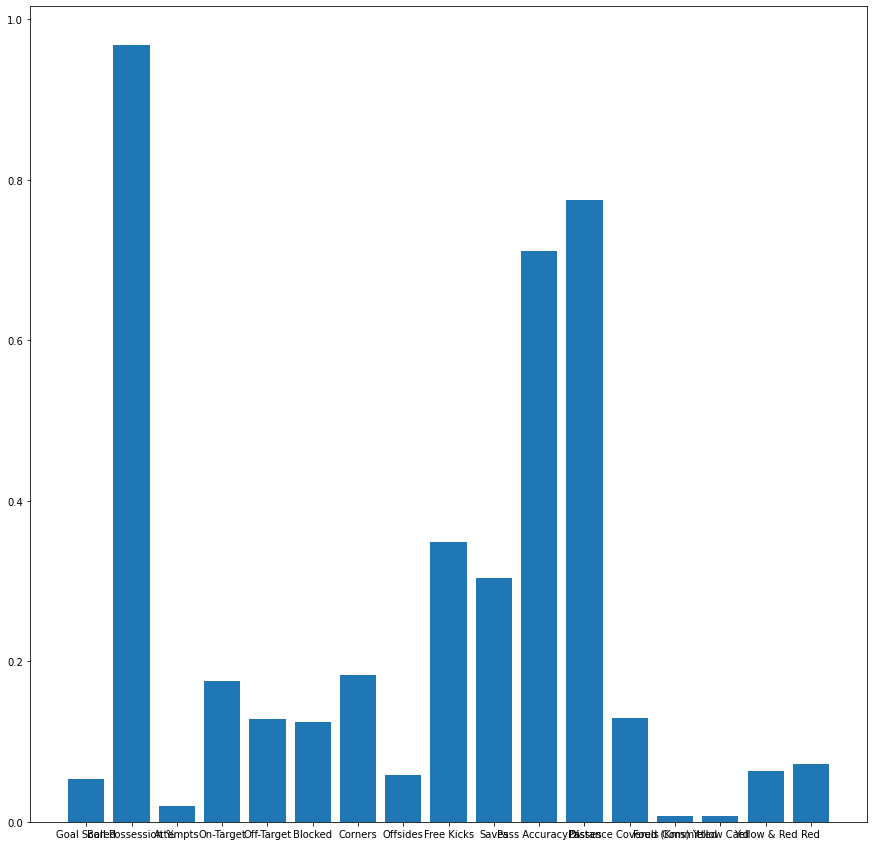

In [73]:
plt.bar(range(17),np.absolute(fa2.loadings_[:,0]),tick_label=fifa_dropped.columns)

จากการวิเคราะห์ผล ดังนั้นจึงสรุปได้ว่า มีตัวแปรอิสระ 6 ตัวแปร ที่สามารถอธิบายข้อมูลได้ และจากกราฟสามารถบอกได้ว่าข้อมูลไหนควรอยู่กลุ่มเดียวกัน